In [2]:
import sys
sys.path.append('/Users/leonardogacituasantos/exoplanet_photosynthesis/python_files/Ifigeneia_code')
import numpy as np
import matplotlib.pyplot as plt
import Thermo_antenna as thermo
import PSII_params
import TypeII_params
from scipy.constants import Boltzmann as kB

# Load the K2-18b attenuated spectrum
spectrum_file = '/Users/leonardogacituasantos/exoplanet_photosynthesis/data_files/processed_data/k2-18b_attenuated_spectrum.txt' 
l, irad_y = np.loadtxt(spectrum_file, unpack=True)

T = PSII_params.T

PSII and Type II quantum efficiency and turnover rate:

In [38]:
# ---------------- PSII Analysis ---------------- #
# PSII Parameters
G_params_PSII = PSII_params.G_params    
Size_params_PSII = PSII_params.Size_params
k_params_PSII = PSII_params.k_params

# PSII Model Calculation
model_PSII = thermo.antenna(l, irad_y, G_params_PSII, Size_params_PSII, k_params_PSII, T)

e_rate = min(model_PSII['nu_e'], 100.0)
phi_F = model_PSII['phi_F']

# Extract and Print Key Parameters for PSII
print('--- PSII Analysis ---')
print('Electron output rate:', e_rate, model_PSII['nu_e'] )
print('Fluorescence quantum yield:', phi_F)

# ---------------- Type II Analysis ---------------- #
# Type II Parameters
G_params_TypeII = TypeII_params.G_params    
Size_params_TypeII = TypeII_params.Size_params
k_params_TypeII = TypeII_params.k_params

# Type II Model Calculation
model_TypeII = thermo.antenna_TypeII(l, irad_y, G_params_TypeII, Size_params_TypeII, k_params_TypeII, T)

# Extract and Print Key Parameters for Type II
print('\n--- Type II Analysis ---')
print('Electron output rate:', model_TypeII['nu_e'])
print('Quantum efficiency:', model_TypeII['phi_F'])

--- PSII Analysis ---
Electron output rate: 10.869871470468844 10.869871470468844
Fluorescence quantum yield: 0.8168878882903052

--- Type II Analysis ---
Electron output rate: 20.755373880344298
Quantum efficiency: 0.9441824347406527


In [36]:
# Load the K2-18b attenuated spectrum
spectrum_file = '/Users/leonardogacituasantos/exoplanet_photosynthesis/data_files/processed_data/flux_at_K2-18b_orbital_distance.txt' 
l, irad_y = np.loadtxt(spectrum_file, unpack=True)

T = PSII_params.T

# ---------------- PSII Analysis ---------------- #
# PSII Parameters
G_params_PSII = PSII_params.G_params    
Size_params_PSII = PSII_params.Size_params
k_params_PSII = PSII_params.k_params

# PSII Model Calculation
model_PSII = thermo.antenna(l, irad_y, G_params_PSII, Size_params_PSII, k_params_PSII, T)

e_rate = min(model_PSII['nu_e'], 100.0)
phi_F = model_PSII['phi_F']

# Extract and Print Key Parameters for PSII
print('--- PSII Analysis ---')
print('Electron output rate:', e_rate, model_PSII['nu_e'] )
print('Fluorescence quantum yield:', phi_F)

# ---------------- Type II Analysis ---------------- #
# Type II Parameters
G_params_TypeII = TypeII_params.G_params    
Size_params_TypeII = TypeII_params.Size_params
k_params_TypeII = TypeII_params.k_params

# Type II Model Calculation
model_TypeII = thermo.antenna_TypeII(l, irad_y, G_params_TypeII, Size_params_TypeII, k_params_TypeII, T)

# Extract and Print Key Parameters for Type II
print('\n--- Type II Analysis ---')
print('Electron output rate:', model_TypeII['nu_e'])
print('Quantum efficiency:', model_TypeII['phi_F'])

--- PSII Analysis ---
Electron output rate: 44.49904807128465 44.49904807128465
Fluorescence quantum yield: 0.8168878882903052

--- Type II Analysis ---
Electron output rate: 84.96828895798248
Quantum efficiency: 0.9441824347406527


Turnover rate and quantum efficiency of PSII Type II:

Saturation levels of electron output rate in PSII system:

In [11]:
l, flux = np.loadtxt(spectrum_file, unpack=True)  # Load wavelength and irradiance

# Convert lists to numpy arrays for compatibility with thermo.antenna_TypeII
l = np.array(l)
flux = np.array(flux)

# Import default parameters for Type II photosystems
G_params = TypeII_params.G_params    
Size_params = TypeII_params.Size_params
k_params = TypeII_params.k_params
T = TypeII_params.T  # Assuming T is defined in TypeII_params

# Initialize variables
n = 1  # Start with N_LHC = 5
Size_params[2] = n  # Re-assign number of antenna subunits
e_rate_old = 0.00001
model = thermo.antenna_TypeII(l, flux, G_params, Size_params, k_params, T)
e_rate_new = model['nu_e']
phi_F_new = model['phi_F']  # Initialize phi_F_new

# Find saturation point
while (e_rate_new - e_rate_old) / e_rate_old >= 0.001:
    n += 1
    Size_params[2] = n  # Re-assign number of antenna subunits
    e_rate_old = e_rate_new
    model = thermo.antenna_TypeII(l, flux, G_params, Size_params, k_params, T)
        
    if model['nu_e'] < 100.0:
        e_rate_new = model['nu_e']
    else:
        e_rate_new = 100.0
            
    phi_F_new = model['phi_F']

# Output results
print(f'For N_LHC = {n}:')
print(f'Electron rate (nu_e): {e_rate_new}')
print(f'Quantum efficiency (phi_F): {phi_F_new}')

For N_LHC = 8:
Electron rate (nu_e): 100.0
Quantum efficiency (phi_F): 0.9137882522691134


Saturation analysis for Type II photosystems:

In [11]:
l, flux = np.loadtxt(spectrum_file, unpack=True)

# Parameters
G_params = TypeII_params.G_params    
Size_params = TypeII_params.Size_params
k_params = TypeII_params.k_params
T = TypeII_params.T  # Ambient temperature

# Saturation analysis
n = 1
Size_params[2] = n  # Start with N_LHC = 5
e_rate_old = 0.00001
model = thermo.antenna_TypeII(l, flux, G_params, Size_params, k_params, T)
e_rate_new = model['nu_e']

phi_F = 0.0
while (e_rate_new - e_rate_old) / e_rate_old >= 0.001:
    n += 1
    Size_params[2] = n
    e_rate_old = e_rate_new
    model = thermo.antenna_TypeII(l, flux, G_params, Size_params, k_params, T)
    
    if model['nu_e'] < 100.0:
        e_rate_new = model['nu_e']
    else:
        e_rate_new = 100.0
            
    phi_F = model['phi_F']

print(f'N_LHC: {n}, Electron rate (nu_e): {e_rate_new}, Quantum efficiency (phi_F): {phi_F}')


N_LHC: 1, Electron rate (nu_e): 1.8837895385866863e-25, Quantum efficiency (phi_F): 0.0


Efficiency of a PSII-like photosystem with antennae of varying sizes:

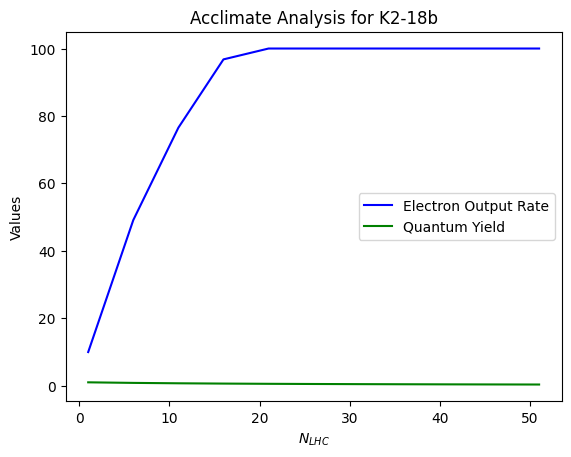

In [12]:
l, irad_y = np.loadtxt(spectrum_file, unpack=True)

# Parameters
G_params = PSII_params.G_params    
Size_params = PSII_params.Size_params
k_params = PSII_params.k_params
T = PSII_params.T  # Ambient temperature
N_LHC = np.arange(1.0, 56.0, 5.0)  # Range of antenna subunits

# Initialize lists for results
e_rate = []
phi_F = []
DeltaS_GRC = []

# Loop over N_LHC
for n in N_LHC:
    Size_params[2] = n
    model = thermo.antenna(l, irad_y, G_params, Size_params, k_params, T)

    e_rate.append(model['nu_e'] if model['nu_e'] <= 100.0 else 100.0)
    phi_F.append(model['phi_F'])
    DeltaS_GRC.append(model['DeltaG_2RC'][0])

# Plotting (adapt as needed)
plt.figure()
plt.plot(N_LHC, e_rate, label='Electron Output Rate', color='blue')
plt.plot(N_LHC, phi_F, label='Quantum Yield', color='green')
plt.xlabel('$N_{LHC}$')
plt.ylabel('Values')
plt.title('Acclimate Analysis for K2-18b')
plt.legend()
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for Beer-Lambert law
alpha = 0.1  # absorption coefficient
D_values = np.linspace(0, 100, 100)  # depths from 0 to 100 meters

# Original input flux
F_0 = irad_y

# Initialize list to store electron output rates
electron_output_rates = []

# Iterate over different depths
for D in D_values:
    # Calculate flux at depth D using Beer's Law
    F_D = F_0 * np.exp(-alpha * D)
    
    # Type II Model Calculation using the attenuated flux
    model_TypeII = thermo.antenna_TypeII(l, F_D, G_params_TypeII, Size_params_TypeII, k_params_TypeII, T)
    
    # Append the electron output rate to the list
    electron_output_rates.append(model_TypeII['nu_e'])

# Plot electron output rate as a function of depth
plt.figure(figsize=(10, 6))
plt.plot(D_values, electron_output_rates, label='Electron Output Rate (Type II)', color='blue')
plt.xlabel('Depth (m)')
plt.ylabel('Electron Output Rate')
plt.title('Electron Output Rate as a Function of Depth')
plt.grid(True)
plt.legend()
plt.show()


NameError: name 'G_params_TypeII' is not defined